# Cestnoprometne nesreče in udeleženci v nesrečah



<h2>Branje podatkov v DataFrame</h2>

Uvozimo Pandas, MatPlotLib ter datoteko PR.mplstyle.

In [75]:
import pandas as pd
import matplotlib.image as img
import matplotlib.pyplot as plt
import re
import numpy as np
import collections
plt.style.use('PR.mplstyle')

Preberemo podatke iz vsake datoteke posebej in jih shranimo v DataFrame.

In [3]:
vrsta_ceste_1 = pd.read_csv('Data/vrsta_ceste_1.csv', sep=',', skiprows=2)
po_lokaciji_2 = pd.read_csv('Data/po_lokaciji_2.csv', sep=',', skiprows=2)
po_mesecu_v_letu_3 = pd.read_csv('Data/po_mesecu_v_letu_3.csv', sep=',', skiprows=2)
po_dnevu_v_tednu_4 = pd.read_csv('Data/po_dnevu_v_tednu_4.csv', sep=',', skiprows=2)
po_urah_dneva_5 = pd.read_csv('Data/po_urah_dneva_5.csv', sep=',', skiprows=2)
po_vrstah_udelezencev_6 = pd.read_csv('Data/po_vrstah_udelezencev_6.csv', sep=',', skiprows=2)
pod_vplivom_alkohola_7 = pd.read_csv('Data/pod_vplivom_alkohola_7.csv', sep=',', skiprows=2)
statisticne_regije_8 = pd.read_csv('Data/statisticne_regije_8.csv', sep=',', skiprows=2)
evidenca_izdanih_potrdil = pd.read_csv('Data/evidenca_izdanih_potrdil.csv', sep=';', skiprows=7)

Grafični prikaz vseh cestnoprometnih nesreč po letih.

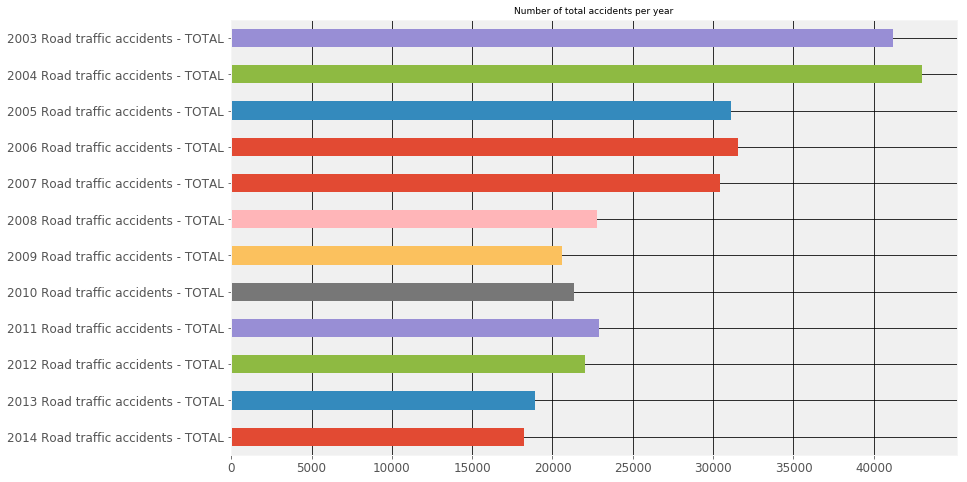

In [4]:
dataVrstaCesteYears = vrsta_ceste_1[['2014 Road traffic accidents - TOTAL', '2013 Road traffic accidents - TOTAL', 
                    '2012 Road traffic accidents - TOTAL', '2011 Road traffic accidents - TOTAL', 
                    '2010 Road traffic accidents - TOTAL', '2009 Road traffic accidents - TOTAL',
                    '2008 Road traffic accidents - TOTAL', '2007 Road traffic accidents - TOTAL',
                    '2006 Road traffic accidents - TOTAL', '2005 Road traffic accidents - TOTAL',
                    '2004 Road traffic accidents - TOTAL', '2003 Road traffic accidents - TOTAL']]

dataVrstaCesteYears.iloc[0,:].plot(kind='barh', fontsize=12, figsize=(13,8), xticks=(0, 5000, 10000, 15000, 20000, 25000, 
                                    30000, 35000, 40000), title='Number of total accidents per year').grid(color='k')

Grafični prikaz vseh cestnoprometnih nesreč glede na vrsto ceste.

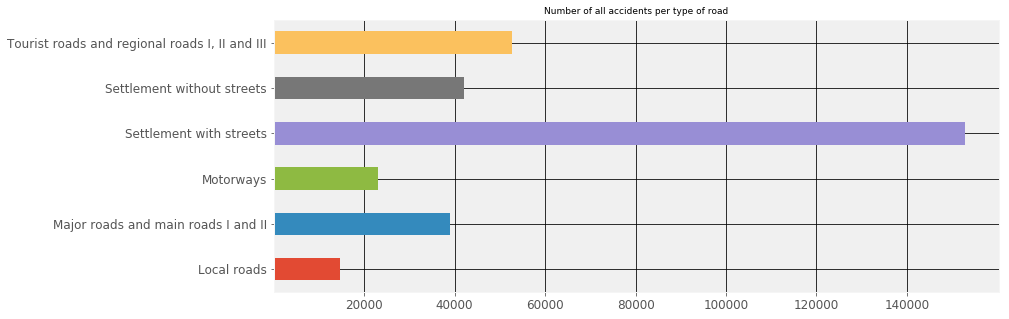

In [5]:
dataVrstaCeste = dataVrstaCesteYears.iloc[1:,:].sum(axis='columns')
#dataVrstaCeste.plot(kind='barh', fontsize=12, figsize=(13, 3)).grid(color='k')

dictVrstaCeste = [{'Motorways': dataVrstaCeste[1], 'Major roads and main roads I and II': dataVrstaCeste[2],
                  'Tourist roads and regional roads I, II and III': dataVrstaCeste[3], 'Local roads': dataVrstaCeste[4],
                  'Settlement with streets': dataVrstaCeste[5], 'Settlement without streets': dataVrstaCeste[6]}]

typeOfRoadNetworkSum = pd.DataFrame(dictVrstaCeste)
typeOfRoadNetworkSum.iloc[0,:].plot(kind='barh', fontsize=12, figsize=(13,5), xticks=(20000, 40000, 60000, 80000, 100000,
                                    120000, 140000), title='Number of all accidents per type of road').grid(color='k')

Grafični prikaz vseh cestnoprometnih nesreč v katerih je nastala materialna škoda po letih.

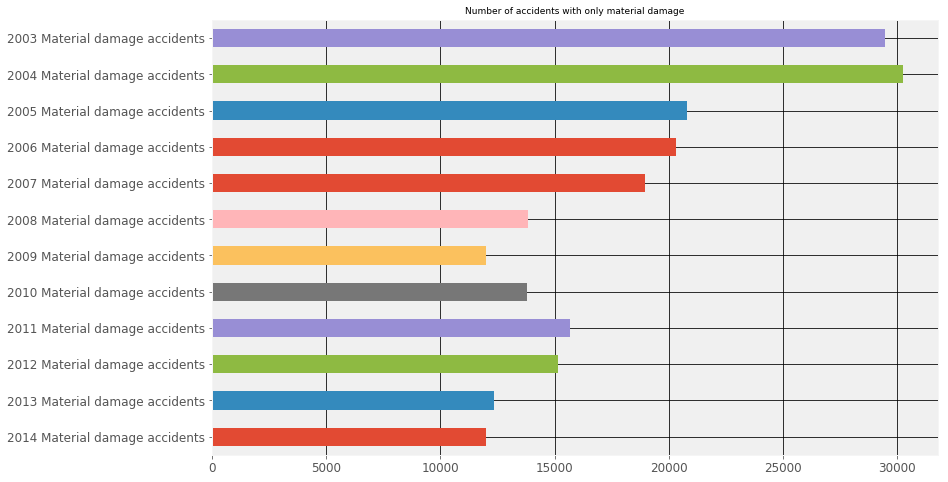

In [6]:
dataVrsteCesteMaterial = vrsta_ceste_1[['2014 Material damage accidents', '2013 Material damage accidents', 
                    '2012 Material damage accidents', '2011 Material damage accidents', 
                    '2010 Material damage accidents', '2009 Material damage accidents', 
                    '2008 Material damage accidents', '2007 Material damage accidents', 
                    '2006 Material damage accidents', '2005 Material damage accidents', 
                    '2004 Material damage accidents', '2003 Material damage accidents']]

dataVrsteCesteMaterial.iloc[0,:].plot(kind='barh', fontsize=12, figsize=(13,8), xticks=(0, 5000, 10000, 15000, 20000, 25000, 
                                    30000), title='Number of accidents with only material damage').grid(color='k')

Grafični prikaz vseh cestnoprometnih nesreč glede na regijo.

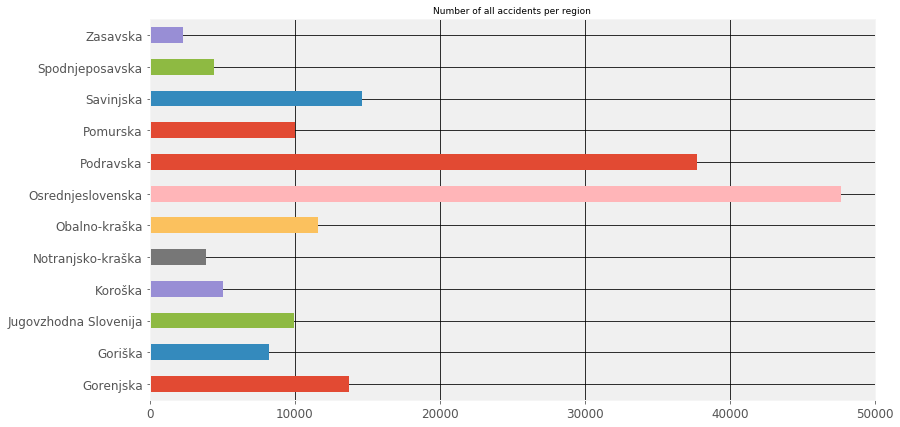

In [7]:
dataStatisticneYears = statisticne_regije_8[['2014 Road traffic accidents - TOTAL', '2013 Road traffic accidents - TOTAL', 
                    '2012 Road traffic accidents - TOTAL', '2011 Road traffic accidents - TOTAL', 
                    '2010 Road traffic accidents - TOTAL', '2009 Road traffic accidents - TOTAL',
                    '2008 Road traffic accidents - TOTAL', '2007 Road traffic accidents - TOTAL']]

dataStatisticneRegije = dataStatisticneYears.iloc[1:,:].sum(axis='columns')
#dataVrstaCeste.plot(kind='barh', fontsize=12, figsize=(13, 3)).grid(color='k')

dictStatisticneRegije = [{'Pomurska': dataStatisticneRegije[1], 'Podravska': dataStatisticneRegije[2],
                          'Koroška': dataStatisticneRegije[3], 'Savinjska': dataVrstaCeste[4],
                          'Zasavska': dataStatisticneRegije[5], 'Spodnjeposavska': dataStatisticneRegije[6],
                         'Jugovzhodna Slovenija': dataStatisticneRegije[7], 'Osrednjeslovenska': dataStatisticneRegije[8],
                         'Gorenjska': dataStatisticneRegije[9], 'Notranjsko-kraška': dataStatisticneRegije[10],
                         'Goriška': dataStatisticneRegije[11], 'Obalno-kraška': dataStatisticneRegije[12],}]

regionSum = pd.DataFrame(dictStatisticneRegije)
regionSum.iloc[0,:].plot(kind='barh', fontsize=12, figsize=(13,7), title='Number of all accidents per region').grid(color='k')


Grafični prikaz cestnoprometnih nesreč za Osrednjeslovensko regijo, kjer je bilo največ nesreč skozi leta.

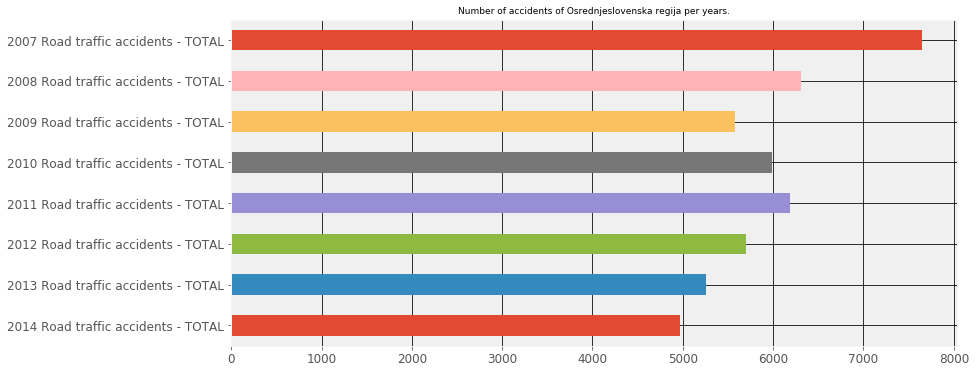

In [8]:
dataStatisticneYears.iloc[8,:].plot(kind='barh', fontsize=12, figsize=(13,6),
                                title='Number of accidents of Osrednjeslovenska regija per years.').grid(color='k')

Pogledamo koliko poslovalnic je v katerem mestu

In [10]:
dictCities = {}
for name in evidenca_izdanih_potrdil['NAZIV IN NASLOV KONTROLNEGA ORGANA     (po abecednem vrstnem redu )']: 
    name = name.replace('\t', ' ')
    name = re.sub(' +', ' ', name)
    name = name.split(', ')
    name = name[-1].split(' ')
    if name[-1] == '':
        name = name[-2]
    else:
        name = name[-1]
    if not name in dictCities:
        dictCities[name] = 1
    else:
        dictCities[name] += 1

dictCities

{'AJDOVSCINA': 1,
 'BISTRICA': 3,
 'BOSTANJ': 1,
 'BREZICE': 1,
 'BREZOVICA': 1,
 'CELJE': 3,
 'CRNOMELJ': 1,
 'DIVACA': 1,
 'DOLINI': 1,
 'DRAVOGRAD': 1,
 'GORICA': 2,
 'GORICI': 2,
 'GRADEC': 1,
 'GROSUPLJE': 1,
 'IZOLA': 1,
 'JESENICE': 1,
 'KAMNIK': 1,
 'KOCEVJE': 1,
 'KOPER': 3,
 'KRANJ': 3,
 'KRSKEM': 1,
 'KRSKO': 1,
 'LENART': 1,
 'LENDAVA': 1,
 'LESCE': 1,
 'LITIJA': 1,
 'LJUBLJANA': 8,
 'LJUBLJANI': 1,
 'LJUTOMER': 1,
 'LOKA': 1,
 'Logatec': 1,
 'MARIBOR': 5,
 'MESTO': 1,
 'ORMOZ': 1,
 'OTOCEC': 1,
 'PODPLAT': 1,
 'POSTOJNA': 1,
 'PTUJ': 2,
 'RADENCI': 1,
 'RADGONA': 1,
 'SELCA': 1,
 'SENTJUR': 1,
 'SKOFLJICA': 1,
 'SLATINA': 1,
 'SOBOTA': 3,
 'TRBOVLJE': 1,
 'TREBNJE': 1,
 'TRZIN': 1,
 'VELENJE': 2,
 'VRHNIKA': 1,
 'ZALEC': 2}

Nato spravimo mesta pod pravo regijo, da lahko dobimo število poslovalnic znotraj ene regije.

In [62]:
dictRegije = {'Pomurska': ['LENDAVA', 'LJUTOMER', 'RADENCI', 'RADGONA', 'SOBOTA'], 
              'Podravska': ['BISTRICA', 'LENART', 'MARIBOR', 'ORMOZ', 'PTUJ'],
              'Koroška': ['DRAVOGRAD', 'GRADEC'], 
              'Savinjska': ['CELJE', 'DOLINI', 'PODPLAT', 'SENTJUR', 'SLATINA', 'VELENJE', 'ZALEC'],
              'Zasavska': ['LITIJA', 'TRBOVLJE'], 
              'Spodnjeposavska': ['BOSTANJ', 'BREZICE', 'KRSKEM', 'KRSKO'],
              'Jugovzhodna Slovenija': ['CRNOMELJ', 'KOCEVJE', 'MESTO', 'OTOCEC', 'TREBNJE'], 
              'Osrednjeslovenska': ['BREZOVICA', 'GROSUPLJE', 'KAMNIK', 'LJUBLJANA', 'LJUBLJANI', 'Logatec', 'SKOFLJICA', 'TRZIN', 'VRHNIKA'],
              'Gorenjska': ['JESENICE', 'KRANJ', 'LESCE', 'LOKA', 'SELCA'], 
              'Notranjsko-kraška': ['POSTOJNA'],
              'Goriška': ['AJDOVSCINA', 'GORICA', 'GORICI'], 
              'Obalno-kraška': ['DIVACA', 'IZOLA', 'KOPER']}

In [63]:
dictRegijeNum = {'Pomurska': 0, 
              'Podravska': 0,
              'Koroška': 0, 
              'Savinjska': 0,
              'Zasavska': 0, 
              'Spodnjeposavska': 0,
              'Jugovzhodna Slovenija': 0, 
              'Osrednjeslovenska': 0,
              'Gorenjska': 0, 
              'Notranjsko-kraška': 0,
              'Goriška': 0, 
              'Obalno-kraška': 0}

for k, v in dictRegije.items():
    for city in v:
        dictRegijeNum[k] += dictCities[city]
dictRegijeNum

{'Gorenjska': 7,
 'Goriška': 5,
 'Jugovzhodna Slovenija': 5,
 'Koroška': 2,
 'Notranjsko-kraška': 1,
 'Obalno-kraška': 5,
 'Osrednjeslovenska': 16,
 'Podravska': 12,
 'Pomurska': 7,
 'Savinjska': 11,
 'Spodnjeposavska': 4,
 'Zasavska': 2}

Izračunamo kakšen odstotek poslovalnic je znotraj ene regije.

In [64]:
allTogether = 0

for v in dictRegijeNum.values():
    allTogether += v

dictPercentA = {'Pomurska': 0, 
              'Podravska': 0,
              'Koroška': 0, 
              'Savinjska': 0,
              'Zasavska': 0, 
              'Spodnjeposavska': 0,
              'Jugovzhodna Slovenija': 0, 
              'Osrednjeslovenska': 0,
              'Gorenjska': 0, 
              'Notranjsko-kraška': 0,
              'Goriška': 0, 
              'Obalno-kraška': 0}

for k, v in dictRegijeNum.items():
    dictPercentA[k] = int(float("{0:.2f}".format(v / allTogether)) * 100)

dictPercentA

{'Gorenjska': 9,
 'Goriška': 6,
 'Jugovzhodna Slovenija': 6,
 'Koroška': 3,
 'Notranjsko-kraška': 1,
 'Obalno-kraška': 6,
 'Osrednjeslovenska': 21,
 'Podravska': 16,
 'Pomurska': 9,
 'Savinjska': 14,
 'Spodnjeposavska': 5,
 'Zasavska': 3}

Spravimo število nesreč glede na regijo v slovar.

In [66]:
dictAccNum = {'Pomurska': 0, 
              'Podravska': 0,
              'Koroška': 0, 
              'Savinjska': 0,
              'Zasavska': 0, 
              'Spodnjeposavska': 0,
              'Jugovzhodna Slovenija': 0, 
              'Osrednjeslovenska': 0,
              'Gorenjska': 0, 
              'Notranjsko-kraška': 0,
              'Goriška': 0, 
              'Obalno-kraška': 0}

for k, v in dictAccNum.items():
    dictAccNum[k] += regionSum[k][0]

dictAccNum

{'Gorenjska': 13755,
 'Goriška': 8257,
 'Jugovzhodna Slovenija': 9969,
 'Koroška': 5024,
 'Notranjsko-kraška': 3898,
 'Obalno-kraška': 11623,
 'Osrednjeslovenska': 47629,
 'Podravska': 37738,
 'Pomurska': 10033,
 'Savinjska': 14651,
 'Spodnjeposavska': 4432,
 'Zasavska': 2320}

Izračunamo odstotek nesreč glede na regijo.

In [67]:
allAccidents = 0

dictPercentN = {'Pomurska': 0, 
              'Podravska': 0,
              'Koroška': 0, 
              'Savinjska': 0,
              'Zasavska': 0, 
              'Spodnjeposavska': 0,
              'Jugovzhodna Slovenija': 0, 
              'Osrednjeslovenska': 0,
              'Gorenjska': 0, 
              'Notranjsko-kraška': 0,
              'Goriška': 0, 
              'Obalno-kraška': 0}

for k, v in dictPercentN.items():
    allAccidents += regionSum[k][0]

for k, v in dictAccNum.items():
    dictPercentN[k] = int(float("{0:.2f}".format(v / allAccidents)) * 100)

dictPercentN

{'Gorenjska': 8,
 'Goriška': 5,
 'Jugovzhodna Slovenija': 6,
 'Koroška': 3,
 'Notranjsko-kraška': 2,
 'Obalno-kraška': 7,
 'Osrednjeslovenska': 28,
 'Podravska': 22,
 'Pomurska': 6,
 'Savinjska': 9,
 'Spodnjeposavska': 3,
 'Zasavska': 1}

Na koncu pa moramo še izračunati kakšno je razmerje med odstotki nesreč in odstotki poslovalnic glede na regijo. Če je razmerje nad 1 pomeni, da je več nesreč kolikor poslovalnic avtovlek v odstotkih. 

In [149]:
rez = {}
for k, v in dictPercentN.items():
    for x, y in dictPercentA.items():
        if k == x:
            rez[k] = v / y
         
rez1 = {}
for k, v in rez.items():
    if v < 1:
        rez1[k] = v * -1
    elif v >= 1:
        rez1[k] = v - 1
rez

{'Gorenjska': 0.8888888888888888,
 'Goriška': 0.8333333333333334,
 'Jugovzhodna Slovenija': 1.0,
 'Koroška': 1.0,
 'Notranjsko-kraška': 2.0,
 'Obalno-kraška': 1.1666666666666667,
 'Osrednjeslovenska': 1.3333333333333333,
 'Podravska': 1.375,
 'Pomurska': 0.6666666666666666,
 'Savinjska': 0.6428571428571429,
 'Spodnjeposavska': 0.6,
 'Zasavska': 0.3333333333333333}

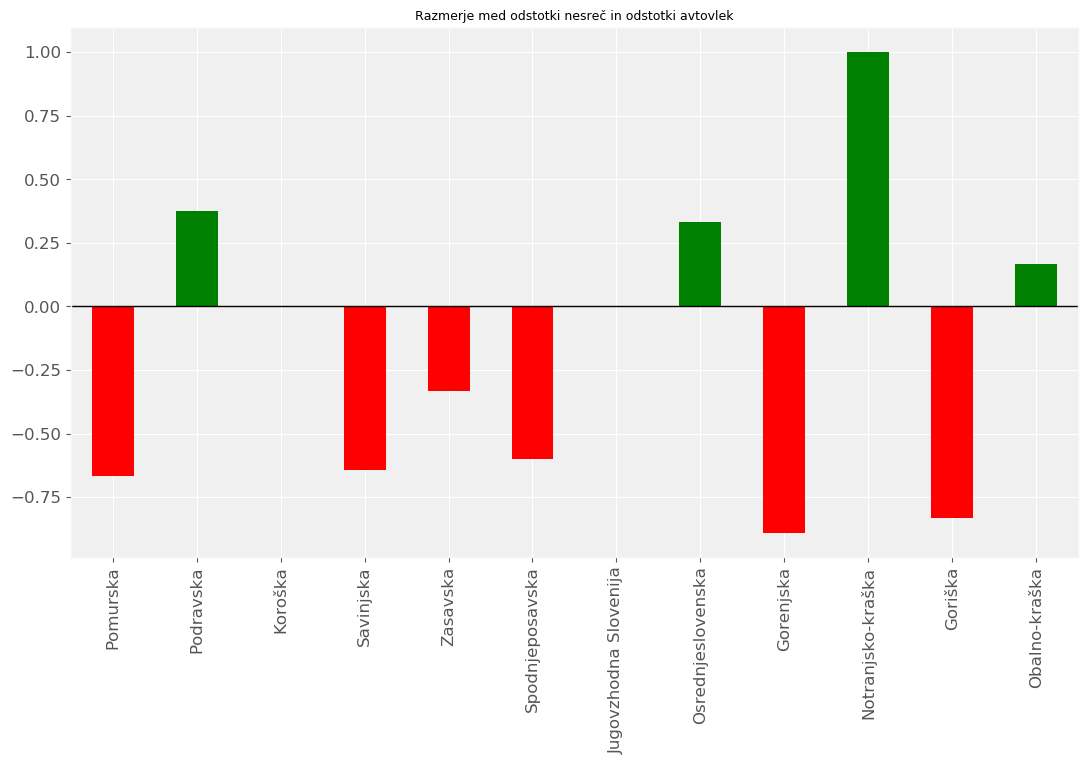

In [150]:
df = pd.DataFrame(list(rez1.items()), columns=['Region', 'Value'])
ax = df.plot(kind='bar', xticks=df.index, fontsize=12, figsize=(13,7), 
             title='Razmerje med odstotki nesreč in odstotki avtovlek', color=[np.where(df.Value<0, 'r', 'g')], legend=False)
ax.set_xticklabels(df.Region)
plt.axhline(0, color='k')

Iz razmerja lahko nato izračunamo odstotke. Tista regija, ki ima najvišji ostotek, tam se najbolj splača odpret novo poslovalnico.

In [153]:
norm = {}
sum = 0
for k, v in rez.items():
    sum += v

for k, v in rez.items():
    norm[k] = int(float("{0:.2f}".format(v / sum)) * 100)

norm

{'Gorenjska': 8,
 'Goriška': 7,
 'Jugovzhodna Slovenija': 8,
 'Koroška': 8,
 'Notranjsko-kraška': 17,
 'Obalno-kraška': 10,
 'Osrednjeslovenska': 11,
 'Podravska': 12,
 'Pomurska': 6,
 'Savinjska': 5,
 'Spodnjeposavska': 5,
 'Zasavska': 3}

[Text(0,0,'Pomurska'),
 Text(0,0,'Podravska'),
 Text(0,0,'Koroška'),
 Text(0,0,'Savinjska'),
 Text(0,0,'Zasavska'),
 Text(0,0,'Spodnjeposavska'),
 Text(0,0,'Jugovzhodna Slovenija'),
 Text(0,0,'Osrednjeslovenska'),
 Text(0,0,'Gorenjska'),
 Text(0,0,'Notranjsko-kraška'),
 Text(0,0,'Goriška'),
 Text(0,0,'Obalno-kraška')]

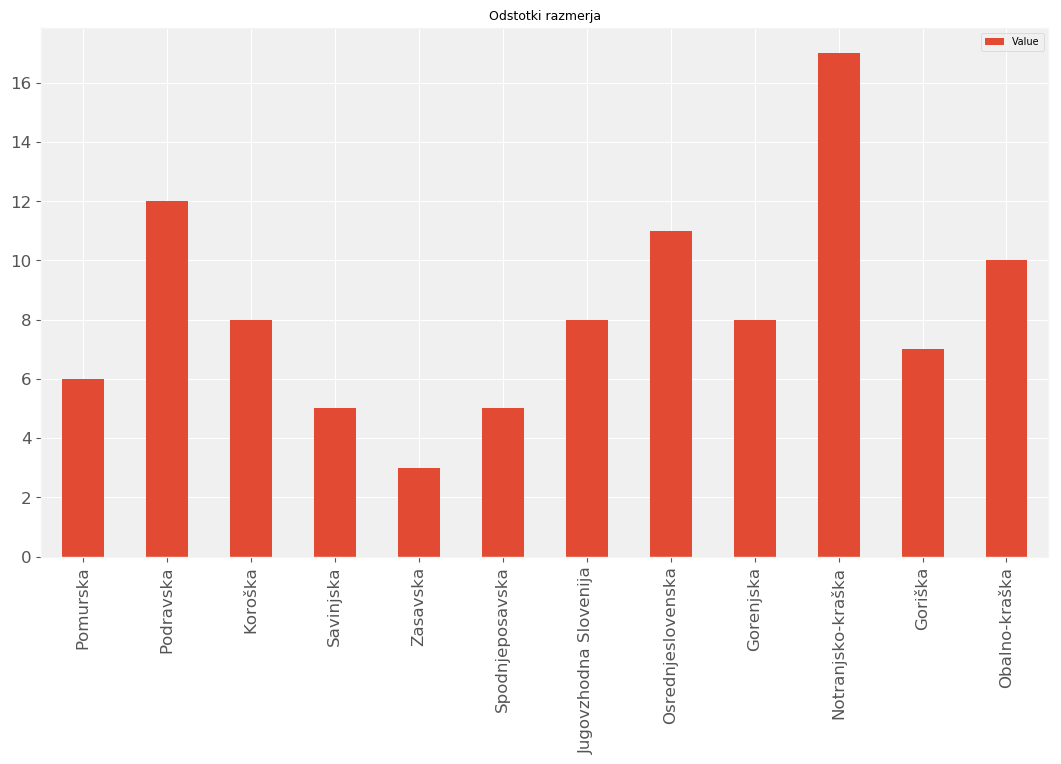

In [158]:
df = pd.DataFrame(list(norm.items()), columns=['Region', 'Value'])
ax = df.plot(kind='bar', xticks=df.index, fontsize=12, figsize=(13,7), 
             title='Odstotki razmerja')
ax.set_xticklabels(df.Region)

**Če gledamo samo odstotke nesreč glede na regije, se nam bi najbolj splačalo odpreti avtovleko v Osrednjeslovenski regiji, saj je tam tudi največ nesreč. Ampak, ker je treba gledati tudi na konkurecno, sva zato pogledala koliko avtovlek ima posamezna regija ter to spravila v odstotke. Da pa dobimo najbolj dobičkonosno lokacijo za odprtje avtovleke pa moramo pogledati razmerje med številom nesreč in številom avtovlek v posamezni regiji. Notranjsko-kraška regija je trenutno najbolj primerna za odprtje avtovleke, saj ima največji odstotek razmerja (večje kot je razmerje bolj se splača).**